# Exploratory Data Analysis (PJM Hourly Energy Consumption)

Time series analysis is used in different field to extract meaningful characteristics of the data. Future values also would be predicted based on historical data using time series method. The energy consumption usually measured according to time is an example of time series data.<p style="text-align: justify;">    

<img src="Figures/ElectPic.JPG" height="600" width="500">

PJM is one of *regional transmission organizations* in the eastern part of the united states consisting of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia. The below figure shows the area that the energy consumption will be investigated.<p style="text-align: justify;">


<img src="Figures/Area.JPG" height="800" width="700">

Data set can be downloaded from <a href="https://www.kaggle.com/robikscube/hourly-energy-consumption" target="_blank" rel="nofollow">here</a>. As you can see in the below figure, the integrated dataset consists of 14 distinct data files, 9 of which are hourly data consumption for regions, and 2 files contain energy consumption for east and west area. `PJM_load` contains data for the period of 1998 to 2002. `pjm_hourly_est` consists of all previous data files. All data in parquet format is also available.<p style="text-align: justify;">

<img src="Figures/RegionData.JPG" height="800" width="700">

The `pjm_hourly_est` file contains all regions data, east, west, and total value belonging to the 1998-2002 period. It would be a good practice to compare the content of this data file with other regional data files and report them. The below table shows the inconsistencies as in three regions the data ranges are not the same.

|Column|Date range in the file|Comment|
| :------------- |:-------------:| :----- |
|PJM_Load|1998-01-01 to 2001-12-31|-|
|PJME|from 2002-01-01|-|
|PJMW|from 2002-04-01|-|
|NI|2004-05-01 to 2011-01-01 |@ Separated file: from 2004-21-31 to 2010-01-02|
|AEP & DAYTON|From 2004-10-01|-|
|DUQ|from 2005-01-01| @ Separated file: From 2005-12-31| 
|DOM|from 2005-05-014|-|
|COMED|from 2011-01-01|-|
|FE|from 2011-06-01|-|
|EKPC|from 2013-06-01| @ Separated file: 2013-12-31| 

As it can be seen in the figure, the sum of energy consumption of regions is not equal to the sum of east and west parts or each of them. <p style="text-align: justify;">

<img src="Figures/SumError.jpg" height="800" width="700">




## Investigation of Regional Energy Consumption
<p style="text-align: justify;">In the following, the hourly energy consumption for all regions and their histograms will be presented. It can be seen that there are two similar behaviours among all region's energy consumption. 
Different parameters have effects on the energy consumption such as changeing in population and temperature variation.<br />For every region we can see that the trend is constant but we have some variations. Visually, we can see that almost maximum or minimum consumption for each region happen in specific time.<br />The properties of data such as trend and periodicity (seasonality) are very important for modeling of time series specially in classic approach. <p style="text-align: justify;">

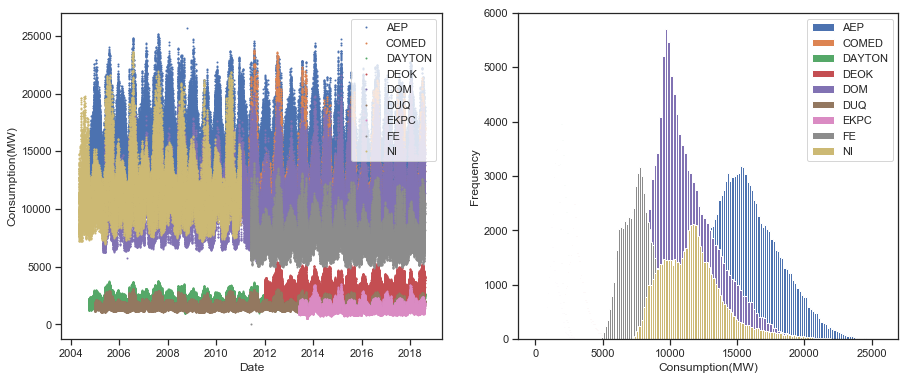

In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()
warnings.filterwarnings('ignore')

# Import the data file
df = pd.read_csv("Sources/pjm_hourly_est_Sorted.csv",",")
Reg=["AEP", "COMED", "DAYTON", "DEOK", "DOM", "DUQ", "EKPC", "FE", "NI"]

plt.figure(figsize=(15,6))
for i in range(len(Reg)):
    
 # Plot Energy Consumption versus Time for all regions   
 plt.subplot(121)
 plt.plot(pd.to_datetime(df.Datetime), df[Reg[i]], 'o', markersize=1)
 plt.legend(Reg)
 plt.xlabel('Date')
 plt.ylabel('Consumption(MW)')
    
# Plot Histogram for all regions  
 plt.subplot(122)
 plt.hist(df[Reg[i]], bins=100)
 plt.legend(Reg)
 plt.xlabel('Consumption(MW)')
 plt.ylabel('Frequency')


Descriptive statistics that summarize the tendency, dispersion and the shape of data distribution are shown in the below table

In [2]:
df.describe()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
count,121273.000000,66497.000000,121275.000000,57739.000000,116189.000000,119068.000000,45334.000000,62874.000000,58450.000000,145366.000000,143206.000000,32896.000000
mean,15499.513717,11420.152112,2037.851140,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,29766.427408
std,2591.399065,2304.139517,393.403153,599.859026,2413.946569,301.740640,378.868404,1331.268006,2371.498701,6464.012166,979.142872,5849.769954
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,14544.000000,487.000000,17461.000000
25%,13630.000000,9780.000000,1749.000000,2687.000000,9322.000000,1444.000000,1185.000000,6807.000000,9954.000000,27573.000000,4907.000000,25473.000000
50%,15310.000000,11152.000000,2009.000000,3013.000000,10501.000000,1630.000000,1386.000000,7700.000000,11521.000000,31421.000000,5530.000000,29655.000000
75%,17200.000000,12510.000000,2279.000000,3449.000000,12378.000000,1819.000000,1699.000000,8556.000000,12896.750000,35650.000000,6252.000000,33073.250000
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,62009.000000,9594.000000,54030.000000


<p style="text-align: justify;">Investigation of regional data in the next figure shows that for two regions ComED and NI, the histograms are almost the same and one of them starts at the end of the other one. This observation might be due the change in the name. Based on Wikipedia, **ComEd** is the electric utility in Illinois, holding monopoly in Chicago and **Northern Illinois (NI)** area. 

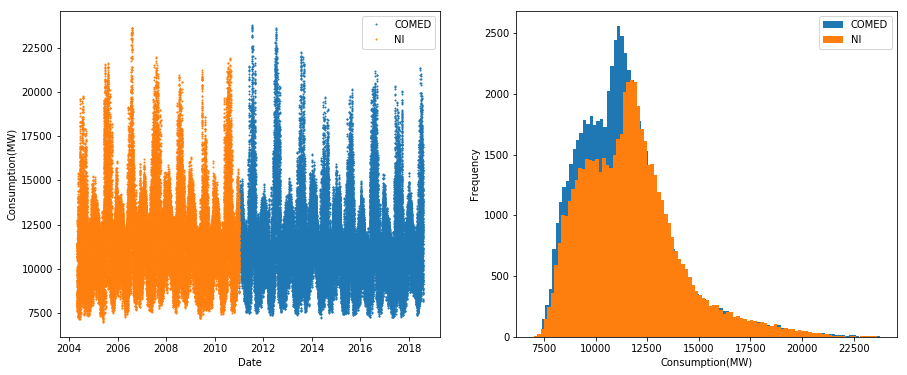

In [3]:
plt.figure(figsize=(15,6))
Reg2=["COMED", "NI"]
for i in range(2):
 
 # Plot Energy Consumption versus Time for regions COMED and NI
 plt.subplot(121)   
 plt.plot(pd.to_datetime(df.Datetime), df[Reg2[i]], 'o', markersize=1)
 plt.legend(Reg2)
 plt.xlabel('Date')
 plt.ylabel('Consumption(MW)')

 # Plot Histogram for regions COMED and NI   
 plt.subplot(122)
 plt.hist(df[Reg2[i]], bins=100)
 plt.legend(Reg2)
 plt.xlabel('Consumption(MW)')
 plt.ylabel('Frequency')

<p style="text-align: justify;">Generally, the most important question regarding available data for regions is whether the modeling of total energy consumption  or building regional models is the best way to predict the future of energy consumption. Certainly, It would be time-consuming to model each region separated while the the accuracy of model will not be guaranteed.

For better understanding energy consumption value and corresponding histogram for all regions are shown separately in next figure. 

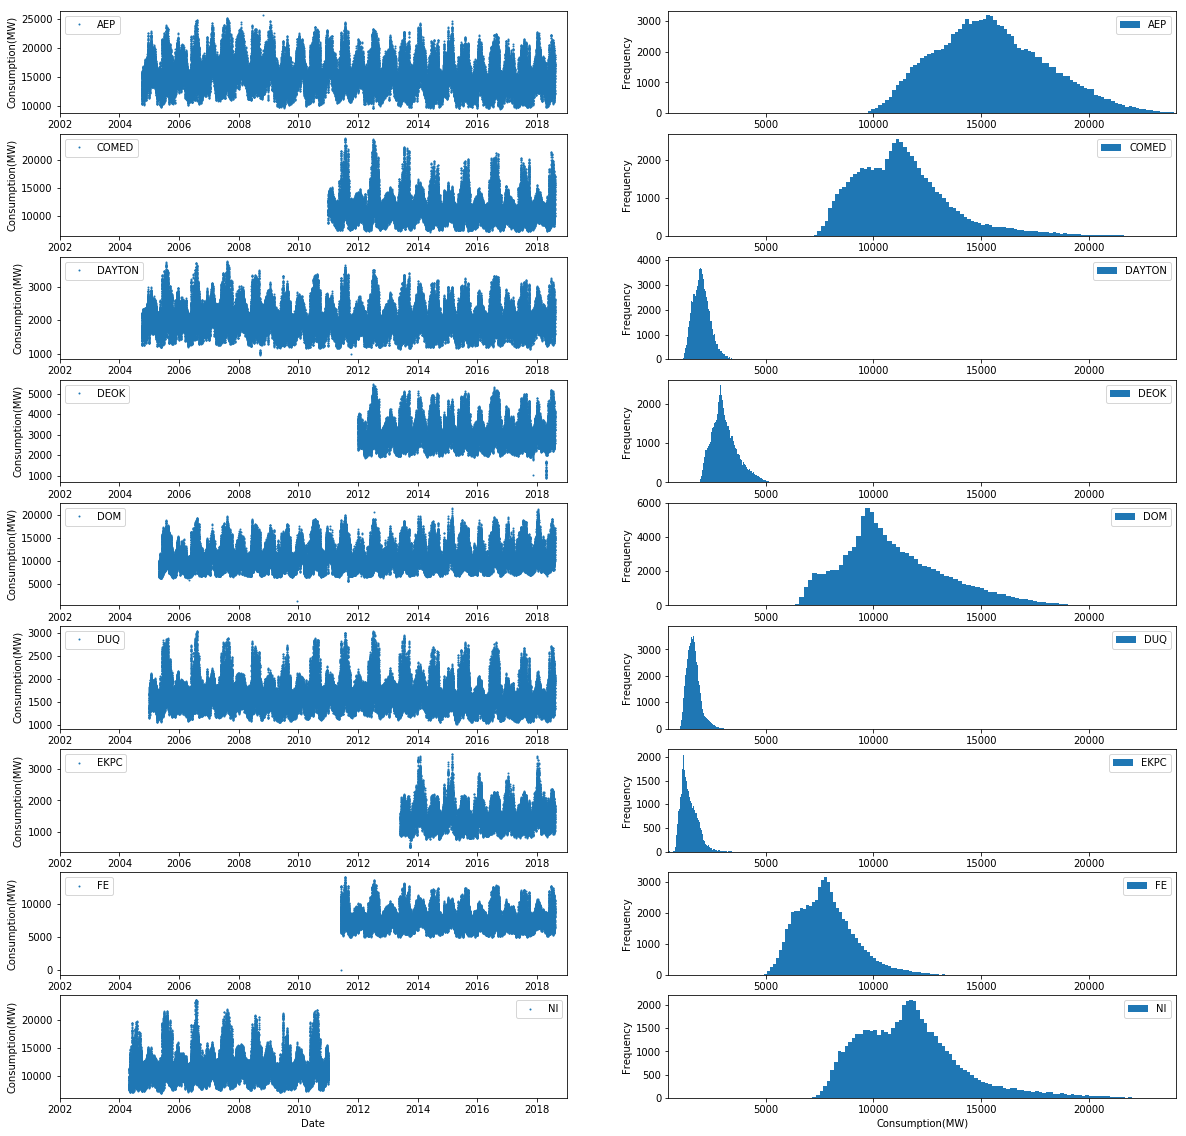

In [4]:
plt.figure(figsize=(20,20))
for j in range(len(Reg)):
 
 # Plot Energy Consumption versus Time for each region
 plt.subplot(9,2,2*j+1)
 plt.plot(pd.to_datetime(df.Datetime), df[Reg[j]], 'o', markersize=1)
 plt.xlim((datetime.datetime(2002, 1, 1), datetime.datetime(2019, 1, 1)))
 plt.legend([str(Reg[j])])
 plt.xlabel('Date')
 plt.ylabel('Consumption(MW)')

 # Plot Histogram for each region   
 plt.subplot(9,2,2*j+2)
 plt.hist(df[Reg[j]], bins=100)
 plt.xlim((500,24000))
 plt.legend([Reg[j]])
 plt.xlabel('Consumption(MW)')
 plt.ylabel('Frequency')

<p style="text-align: justify;">In this study we will focus on total energy consumption for the "east" part (Areas Served by PJM). In the next section we will take a look at east energy consumption and visualize it to find out more information about the data.<p style="text-align: justify;">

## East Hourly Energy Consumption Data
<p style="text-align: justify;">The below figure shows the hourly energy consumption for east part. For better visualization data was re-sampled with the daily frequency (windows = 1 Day).The longer the window, the smoother the trend will be. Smoothing**<sup>1</sup>** could be an indication of trend. <p style="text-align: justify;">

<p style="text-align: justify;">To see the Seasonality, total consumption is presented for  the period 2012-2013. It seems every year, we have minimum consumption around May and November and maximum consumption around August. So, we have more energy consumption during summer seasons.<p style="text-align: justify;">

___
_**<sup>1</sup>** It has other applications such as generation of moving average model which the future value of the variable depends on the average n of its previous values. It Also provides additional insight into the learning problem for supervised learning models. These applications will be discussed later._  

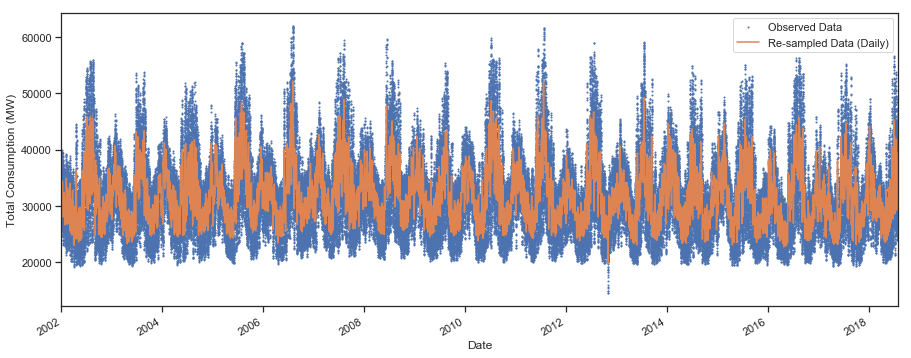

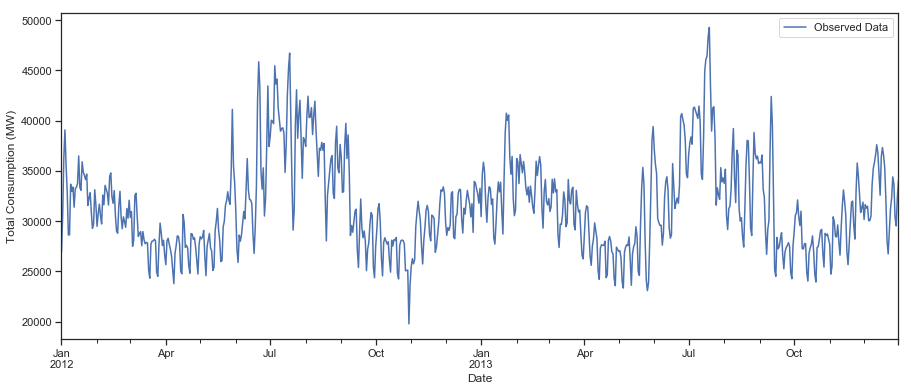

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
import pandas as pd
import numpy as np
import warnings
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters

warnings.filterwarnings('ignore')
register_matplotlib_converters()

# Import the data file
df = pd.read_csv("Sources/EastTotalConsumption.csv", names=['datetime', 'totalconsum'],header=1)
df.totalconsum.astype(int, copy=False);

# Resample dataset (Hourly to  Daily periods):
df_re=df
df_re=df_re.reset_index().set_index("datetime")
df_re.index = pd.to_datetime(df_re.index)
df_re=df_re.resample('d').mean()
df_re.columns = [ "Datetime", "totalconsum"]
df_re=df_re.reset_index().set_index("Datetime")

# Plot observed and re-sampled data (Daily)
fig, ax = plt.subplots(figsize=(15,6))
plt.plot_date(pd.to_datetime(df.datetime), df.totalconsum,fmt='o',markersize=1, label="Observe")
df_re.plot(x="datetime", y="totalconsum", ax=ax)
plt.legend(['Observed Data','Re-sampled Data (Daily)'])
plt.xlabel('Date')
plt.ylabel('Total Consumption (MW)')

# Zoom: For Two years (2012-2013)
zoom_range = df_re[(df_re.datetime >= '2012-01-01') & (df_re.datetime < '2014-01-01')].index
fig, ax = plt.subplots(figsize=(15,6))
df_re.loc[zoom_range].plot(x="datetime", y="totalconsum", ax=ax, label="2012-2013 ")
plt.legend(['Observed Data'])
plt.xlabel('Date')
plt.ylabel('Total Consumption (MW)')
plt.show()




Visually, it is almost clear that we have no trend but there is seasonality in data, we can use `Decomposition` method for evaluation.

### Decomposition
<p style="text-align: justify;">One of the methods for evaluation of Model type (Additive or Multiplicative), trend, seasonality and residuals generation is`seasonal_decompose`.<p style="text-align: justify;">
<br />We will discuss about these terms in Stationary subject which is the most important subject in time series analysis. 
<br />It is important to select between the additive and multiplicative models, after analyzing the series. In additive model the seasonality stays relatively constant while, in multiplicative model it changes with time. The definition of models are as follow<p style="text-align: justify;">
* **Additive:** _Time series = Seasonal + Trend + Residual_ 
* **Multiplicative**: _Time series = Trend * Seasonal *Residual_

<p style="text-align: justify;">The other output from decomposition is the generation of the residuals which is the original data minus trend and seasonality. It means that we can use residuals for modeling instead of original one, and after building the model we could add trend and seasonality to the model to forecast the future. In this section, we have used `seasonal_decompose` for diagnosing!<p style="text-align: justify;">    

Text(0.5, 0, 'Date')

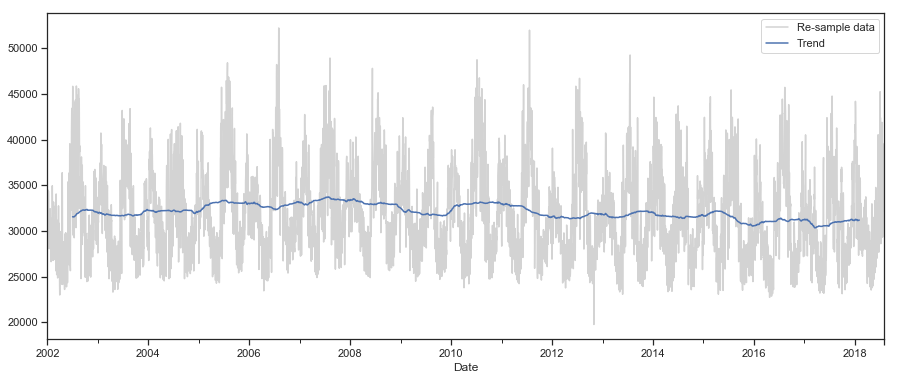

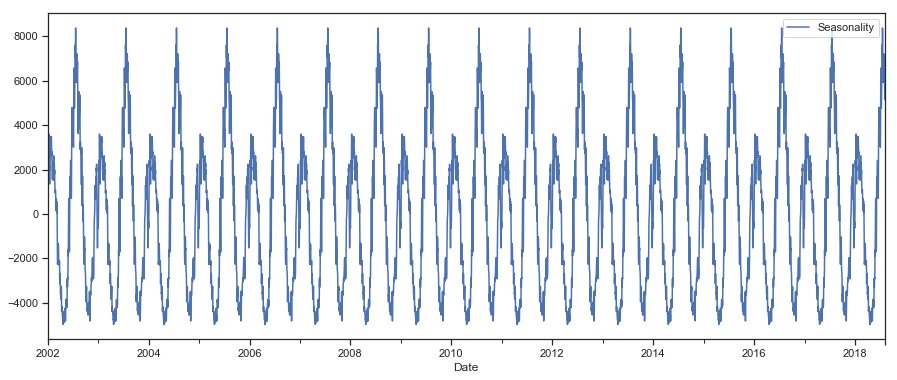

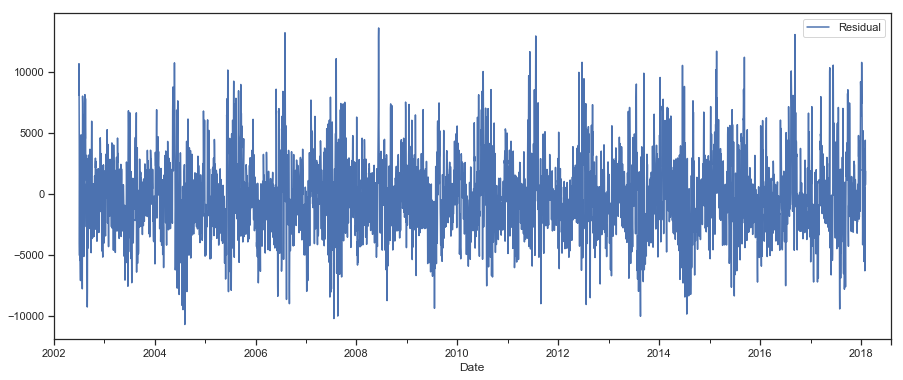

In [6]:
# Using Decomposition function to determine Trend, seasonality and Residual

# Decomposition Frequency: 365(Daily period) 
decompfreq = 365

# Select Model Type
model = 'additive'

decomposition = seasonal_decompose(
    df_re.set_index("datetime").totalconsum.interpolate("linear"),
    freq=decompfreq,
    model=model)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Trend, seasonality and Residual components
fig, ax = plt.subplots(figsize=(15,6))
df_re.plot(x="datetime", y="totalconsum", ax=ax, c='lightgrey')
trend.plot(ax=ax)
plt.legend(["Re-sample data", "Trend"])
plt.xlabel('Date')

fig, ax = plt.subplots(figsize=(15,6))
seasonal.plot(ax=ax)
plt.legend(["Seasonality"])
plt.xlabel('Date')

fig, ax = plt.subplots(figsize=(15,6))
residual.plot(ax=ax)
plt.legend(["Residual"])
plt.xlabel('Date')


To see the variation of energy consumption during the day, two specific days of year are selected. 
In the following, the daily trend for these two representative days (in Hot and Cold Seasons) will be presented. 

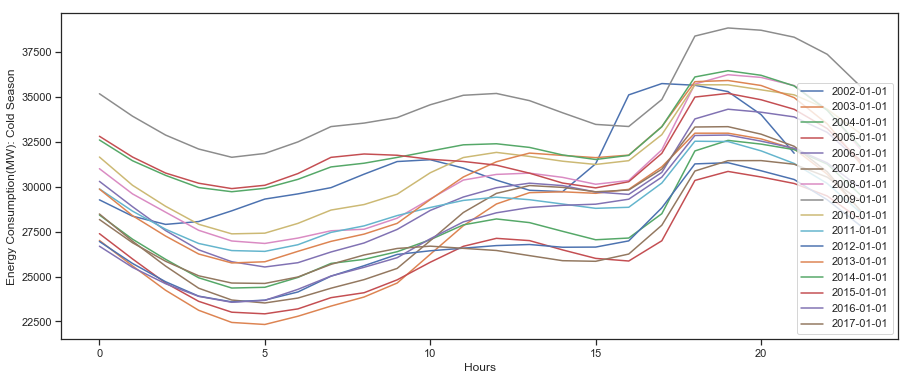

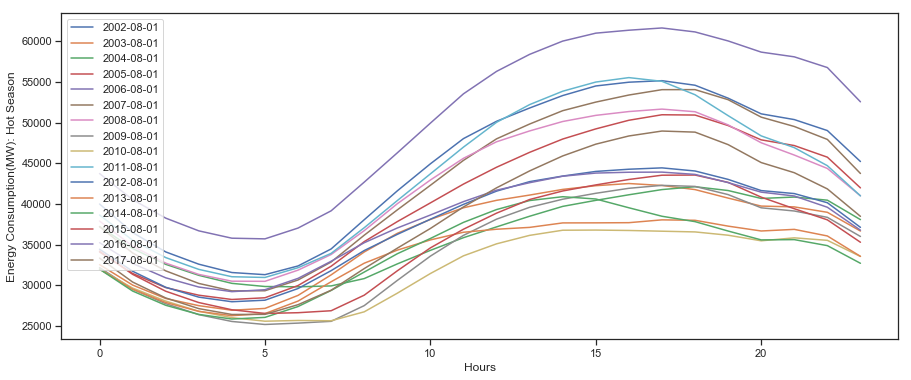

In [7]:
# Daily Trend of energy consumption
def DayTrend(ColdorHot):
 if (ColdorHot=='Cold'):
     C_HTime='01'
 elif (ColdorHot=='Hot'):
     C_HTime = '08'

 # plot Consumption (Daily trend):
 fig, ax = plt.subplots(figsize=(15, 6))
 for days in range(16):
    firstofday=str(2002+days)+'-'+str(C_HTime)+'-01'
    finalofday = str(2002+days) +'-'+str(C_HTime)+'-02'
    zoom_Drange = df[(df.datetime >=firstofday) & (df.datetime < finalofday)].index
    dayperiod=zoom_Drange-zoom_Drange[0]
    plt.plot(dayperiod, df.totalconsum[zoom_Drange],'-',  label=str(2002+days)+'-'+str(C_HTime)+'-01')
    plt.ylabel('Energy Consumption(MW): '+ColdorHot+' Season')
 plt.xlabel('Hours')
 ax.legend(loc="best")

DayTrend('Cold')
DayTrend('Hot')


In both representative days, we have a minimum consumption around 5 AM. The maximum value for Cold season is around 7 PM while this is 5 PM for Hot Season. 

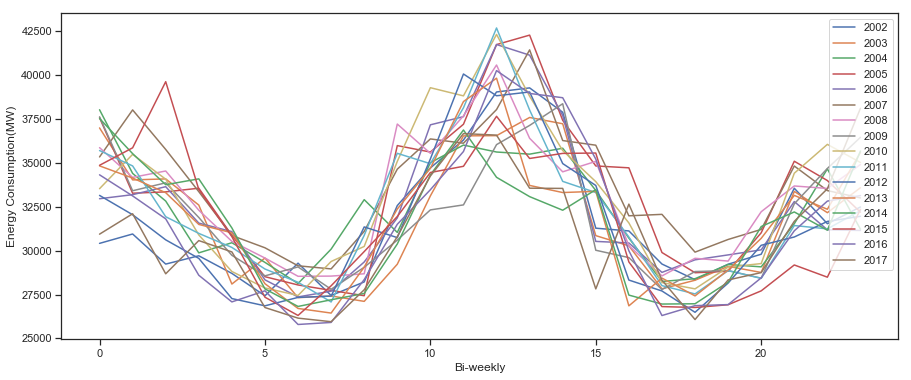

In [8]:
# Resample dataset (Hourly to  Bi-Weekly periods):
df_re2=df
df_re2=df_re2.reset_index().set_index("datetime")
df_re2.index = pd.to_datetime(df_re2.index)
df_re2=df_re2.resample('SM').mean()
df_re2.columns = [ "Datetime", "totalconsum"]
df_re2=df_re2.reset_index().set_index("Datetime")

# plot Consumption(year trend):
plt.figure(figsize=(15, 6))
for years in range(16):
    firstofyear=str(2002+years)+'-01-01'
    finalofyear = str(2003+years) + '-01-01'
    zoom_Yrange = df_re2[(df_re2.datetime >=firstofyear) & (df_re2.datetime < finalofyear)]
    plt.plot(range(0,24,1),zoom_Yrange.totalconsum ,'-',  label=str(2002+years))
    plt.ylabel('Energy Consumption(MW)')
plt.xlabel('Bi-weekly')
plt.legend(loc='upper right')
plt.show()

<p style="text-align: justify;">Now we are familiar with the data. Sometimes we know about the facts and try to approve them in the data and vise versa, sometime we can  have a conclusion based on the review and visualization of dataset.<p style="text-align: justify;"> 

While we are thinking about other aspects of our data and finding some other qualitative insight, we can start modeling.    